In [56]:
import pandas as pd

df = pd.read_csv("../data/violations.csv")
df.describe(include='all')

,case_no,status_dttm,status,code,value,description,violation_stno,violation_sthigh,violation_street,violation_suffix,...,ward,contact_addr1,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude,location
count,24340,24340,24340,24340,0.0,24118,24340,4998,24340,24152,...,24340,24263,4334,24275,24271,24251,24340.000000,24340.000000,24340.000000,24340
unique,17950,17940,2,586,NaN,492,1452,810,1978,38,...,23,13143,2094,1076,124,1576,NaN,NaN,NaN,11395
top,HVIOL-650250,2022-12-14 14:57:06,Closed,105.1,NaN,Failure to Obtain Permit,9,,Washington,ST,...,14,546 East Broadway,Unit 1,Boston,MA,02128,NaN,NaN,NaN,"(42.26731000042018, -71.10906000146936)"
freq,36,36,17801,3431,NaN,3431,394,1208,588,17289,...,2360,77,143,2442,21878,1672,NaN,NaN,NaN,47
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,141599.583155,42.321076,-71.082249,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,101801.421976,0.033561,0.032181,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,42.232100,-71.181830,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63883.500000,42.295070,-71.097500,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,118380.000000,42.318820,-71.078661,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,199384.000000,42.348986,-71.061391,NaN


In [57]:
df.head(10)

,case_no,status_dttm,status,code,value,description,violation_stno,violation_sthigh,violation_street,violation_suffix,...,ward,contact_addr1,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude,location
0,HVIOL-662883,2023-02-22 16:34:56,Open,CMR410.482 A,NaN,Smoke Detectors & Carbon Monoxide Alarms - Own...,116,NaN,Hutchings,ST,...,12,116 Hutchings St #1,NaN,Dorchester,MA,02121,256986,42.311610,-71.092340,"(42.31161000001751, -71.09234000120948)"
1,HVIOL-662883,2023-02-22 16:34:56,Open,CMR410.500,NaN,Owners Responsibility to Maintain Structural E...,116,NaN,Hutchings,ST,...,12,116 Hutchings St #1,NaN,Dorchester,MA,02121,256986,42.311610,-71.092340,"(42.31161000001751, -71.09234000120948)"
2,HVIOL-662883,2023-02-22 16:34:56,Open,CMR410.482 A,NaN,Smoke Detectors & Carbon Monoxide Alarms - Own...,116,NaN,Hutchings,ST,...,12,116 Hutchings St #1,NaN,Dorchester,MA,02121,256986,42.311610,-71.092340,"(42.31161000001751, -71.09234000120948)"
3,HVIOL-662883,2023-02-22 16:34:56,Open,CMR410.482 A,NaN,Smoke Detectors & Carbon Monoxide Alarms - Own...,116,NaN,Hutchings,ST,...,12,116 Hutchings St #1,NaN,Dorchester,MA,02121,256986,42.311610,-71.092340,"(42.31161000001751, -71.09234000120948)"
4,HVIOL-662883,2023-02-22 16:34:56,Open,CMR410.500,NaN,Owners Responsibility to Maintain Structural E...,116,NaN,Hutchings,ST,...,12,116 Hutchings St #1,NaN,Dorchester,MA,02121,256986,42.311610,-71.092340,"(42.31161000001751, -71.09234000120948)"
5,HVIOL-662883,2023-02-22 16:34:56,Open,CMR410.482 A,NaN,Smoke Detectors & Carbon Monoxide Alarms - Own...,116,NaN,Hutchings,ST,...,12,116 Hutchings St #1,NaN,Dorchester,MA,02121,256986,42.311610,-71.092340,"(42.31161000001751, -71.09234000120948)"
6,HVIOL-662682,2023-02-21 15:29:54,Open,CMR410.351 B,NaN,Owners Installation/Maintenance Responsibility...,974,NaN,Saratoga,ST,...,01,60 Border St,NaN,East Boston,MA,02128,306474,42.387110,-71.007620,"(42.38711000004081, -71.007620001253)"
7,HVIOL-662681,2023-02-21 15:29:32,Open,CMR410.482 A,NaN,Smoke Detectors & Carbon Monoxide Alarms - Own...,734,NaN,Cummins,HWY,...,18,104 Thatcher St.,NaN,Milton,MA,02186,221206,42.270911,-71.101907,"(42.27091100003018, -71.10190700119084)"
8,V650006,2023-02-21 15:18:06,Open,116,NaN,Unsafe Structures,690,710,American Legion,HWY,...,18,34 Essex St,NaN,Andover,MA,01810,3179,42.283334,-71.112034,"(42.28333399981036, -71.1120340009656)"
9,V619158,2023-02-21 15:13:54,Open,102.8,NaN,Maintenance,690,710,American Legion,HWY,...,18,34 ESSEX STREET,NaN,ANDOVER,MA,01810,3179,42.283334,-71.112034,"(42.28333399981036, -71.1120340009656)"


In [58]:
# Check for duplicate data points
duplicates = df.duplicated()
duplicates = duplicates[duplicates == True]
len(duplicates)

1714

In [59]:
groupby_code = df.groupby('code')
groupby_code.describe()

value                              sam_id                 ...  \
           count mean std min 25% 50% 75% max  count           mean  ...   
code                                                                 ...   
.            0.0  NaN NaN NaN NaN NaN NaN NaN    2.0   21785.000000  ...   
10.0         0.0  NaN NaN NaN NaN NaN NaN NaN    1.0   86997.000000  ...   
10.02        0.0  NaN NaN NaN NaN NaN NaN NaN    3.0  129503.333333  ...   
10.02 (18)   0.0  NaN NaN NaN NaN NaN NaN NaN   11.0   81466.818182  ...   
10.02 (6)    0.0  NaN NaN NaN NaN NaN NaN NaN    1.0  110256.000000  ...   
...          ...  ...  ..  ..  ..  ..  ..  ..    ...            ...  ...   
r109.3       0.0  NaN NaN NaN NaN NaN NaN NaN    3.0   52663.666667  ...   
r109.4       0.0  NaN NaN NaN NaN NaN NaN NaN    2.0  123574.500000  ...   
r116.2       0.0  NaN NaN NaN NaN NaN NaN NaN   18.0   91402.111111  ...   
r310.1       0.0  NaN NaN NaN NaN NaN NaN NaN    8.0   99591.375000  ...   
test123      0.0  NaN NaN NaN NaN NaN NaN NaN    2.0  348056.000000  ...   

             latitude            longitude                                 \
                  75%        max     count       mean       std       min   
code                                                                        
.           42.356720  42.356720       2.0 -71.060690  0.000000 -71.06069   
10.0        42.373300  42.373300       1.0 -71.039370       NaN -71.03937   
10.02       42.354417  42.365295       3.0 -71.072837  0.013937 -71.08893   
10.02 (18)  42.359694  42.364570      11.0 -71.072463  0.027865 -71.13686   
10.02 (6)   42.258020  42.258020       1.0 -71.116500       NaN -71.11650   
...               ...        ...       ...        ...       ...       ...   
r109.3      42.345975  42.356430       3.0 -71.067003  0.019781 -71.08380   
r109.4      42.351503  42.357560       2.0 -71.079705  0.070887 -71.12983   
r116.2      42.319272  42.343019      18.0 -71.075145  0.016480 -71.11168   
r310.1      42.307225  42.349896       8.0 -71.089297  0.022153 -71.13464   
test123     42.352240  42.352240       2.0 -71.065720  0.000000 -71.06572   

                                                       
                  25%        50%        75%       max  
code                                                   
.          -71.060690 -71.060690 -71.060690 -71.06069  
10.0       -71.039370 -71.039370 -71.039370 -71.03937  
10.02      -71.076906 -71.064882 -71.064791 -71.06470  
10.02 (18) -71.075379 -71.063062 -71.062898 -71.03094  
10.02 (6)  -71.116500 -71.116500 -71.116500 -71.11650  
...               ...        ...        ...       ...  
r109.3     -71.077905 -71.072010 -71.058605 -71.04520  
r109.4     -71.104768 -71.079705 -71.054643 -71.02958  
r116.2     -71.087580 -71.079057 -71.061540 -71.05162  
r310.1     -71.095455 -71.088675 -71.074814 -71.06485  
test123    -71.065720 -71.065720 -71.065720 -71.06572  

[586 rows x 32 columns]

In [60]:
# Hard-Coded Dictionary of hazardous conditions + violation codes
violations = {"Hot Water": "410.190", "Potable Water": "410.180", "Heating Facilities Required": "410.200", "Temperature Requirements": "410.201",
              "Asbestos Material": "410.353", "Use of Lead Paint Prohibited": "410.502"}

In [61]:


#Convert to lower case and remove whitespace so that we don't get duplicates
df['contact_addr1'] = df['contact_addr1'].apply(lambda x : str(x).lower())
df['contact_city'] = df['contact_city'].apply(lambda x : str(x).lower().replace(' ', ''))
#df.columns = df.columns.str.replace(' ', '')


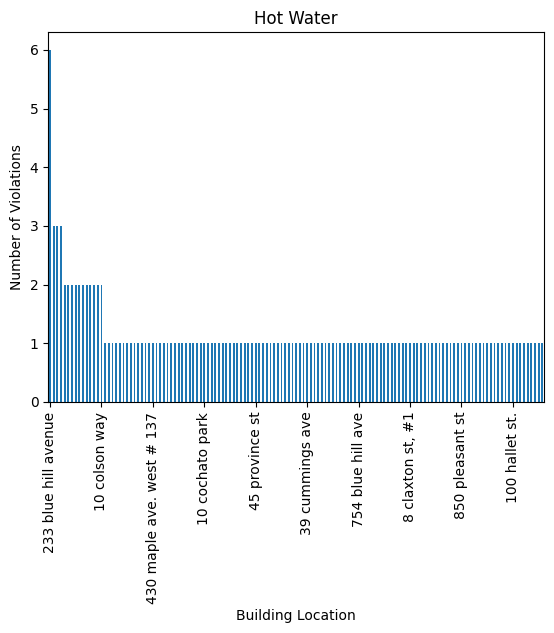

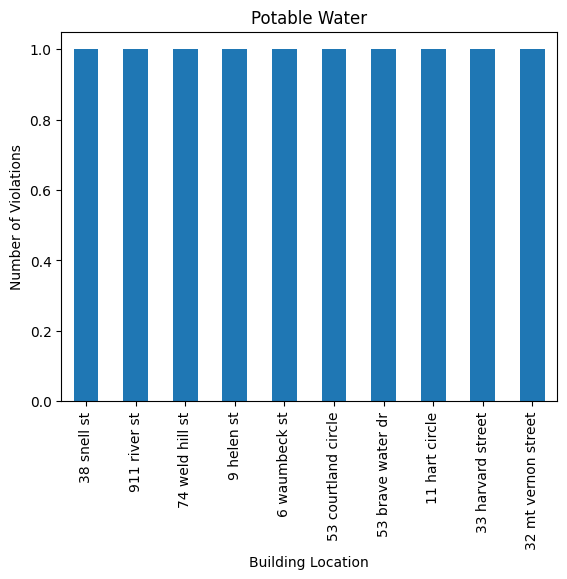

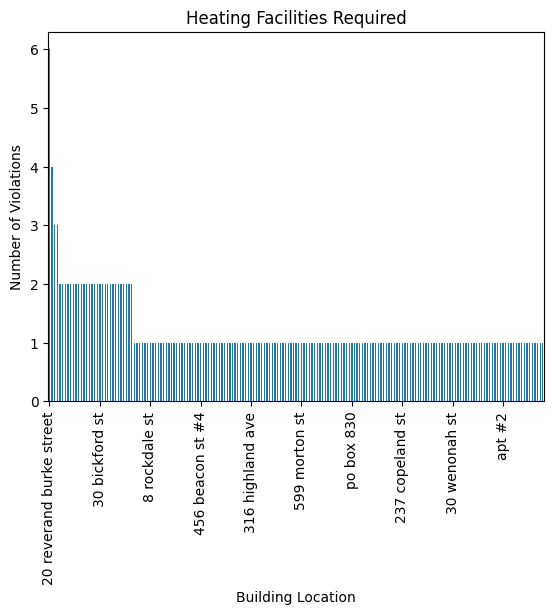

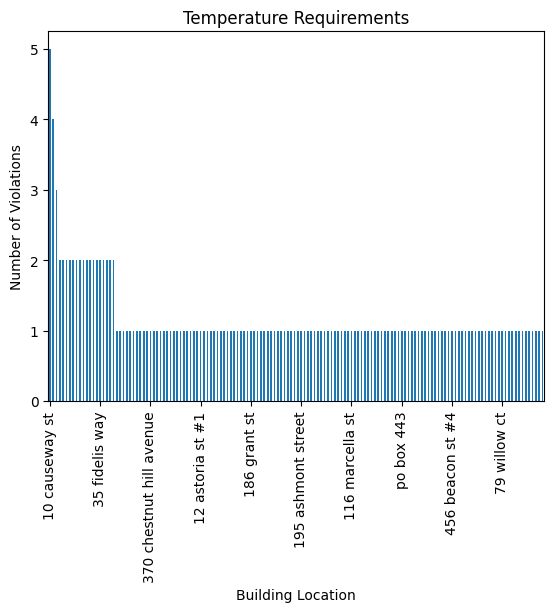

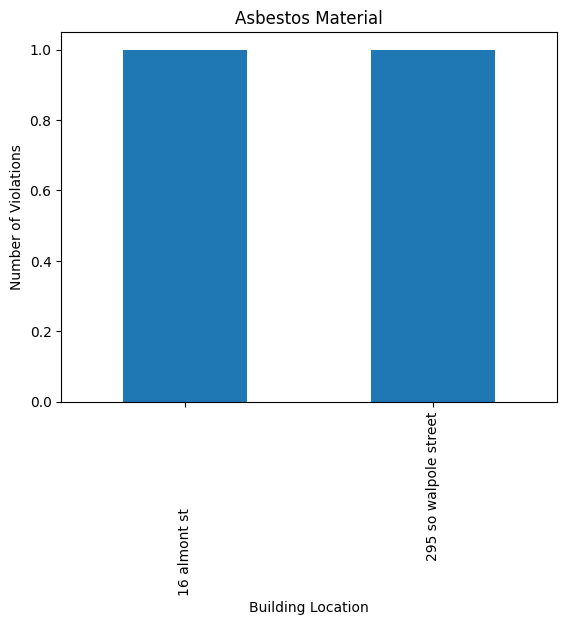

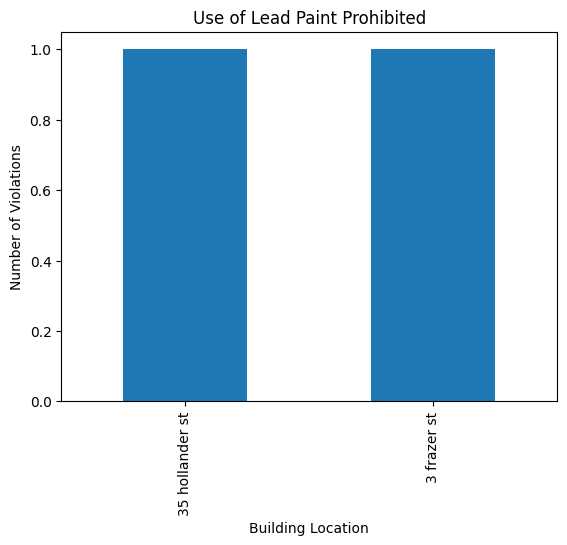

In [62]:
import matplotlib.pyplot as plt
'''Okay to save the data returned by value_counts I am converting it to a df, and to save the df for each violation I am saving it to a dictionary'''
violations_by_building = {} #key: violation name, value: df that contains the location and frequency of the violations

# Go through each of the hazardous conditions violations
for name, code in violations.items():
    # Look at only this violation (code name in the dataset have other values beyond the code # so had to use contains)
    mask = df['code'].str.contains(code, case=False, na=False)
    df_code =  df[mask]
    # Count the number of violations for each address
    count = df_code['contact_addr1'].value_counts()

    #Convert value counts into a new dataframe to save the data
    df_violation = pd.DataFrame(count)
    df_violation = df_violation.reset_index()
    df_violation.columns = ['Location', 'Counts']
    violations_by_building[name] = df_violation
    
    # Plot the count 
    count.plot(kind='bar', rot=0)

    plt.locator_params(axis='x', nbins=10)
    plt.xticks(rotation='vertical')

    plt.title(name)
    plt.xlabel('Building Location')
    plt.ylabel('Number of Violations')
    plt.show()

    # TODO: Save counts and use that to Create a ranking 
  

In [63]:
# # Plot tables for each violation with frequency by building
# for violation, df in violations_by_building.items():
    
#     fig, ax = plt.subplots()
#     ax.axis('off')
#     ax.axis('tight')
#     ax.set_title(violation)
#     ax.set_title(violation, fontsize=8, y=(0.037 *len(df.values)), pad=-14)
#     t= ax.table(cellText=df.values, colWidths = [0.4]*len(df.columns),  colLabels=df.columns, loc='center')
#     t.auto_set_font_size(False) 
#     t.set_fontsize(8)
#     #fig.tight_layout()
#     plt.show()
    
# #TODO: fix formatting issues with tables

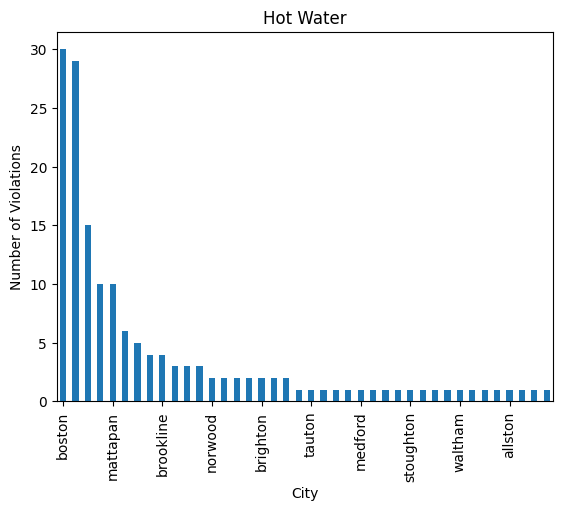

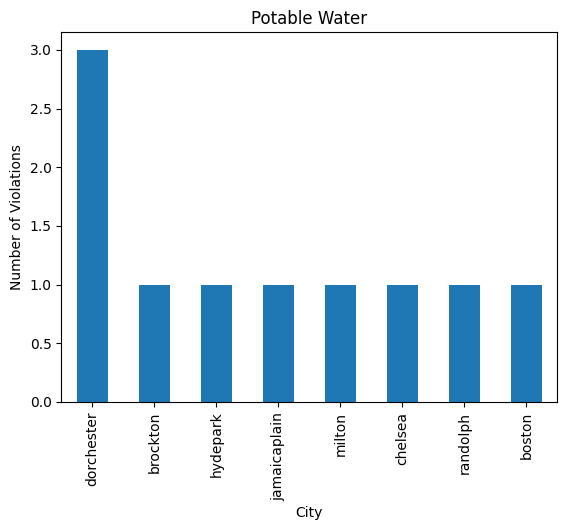

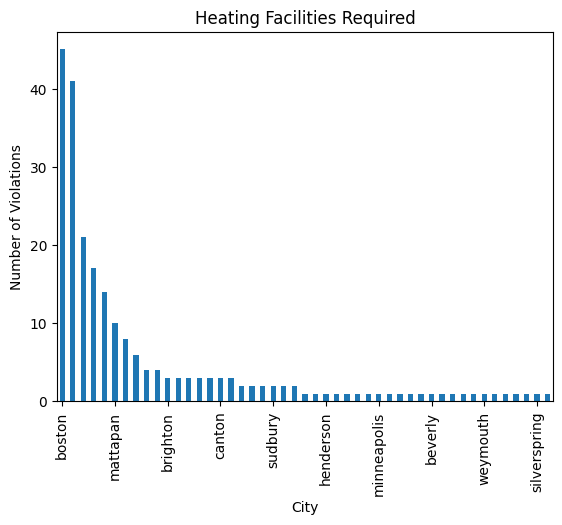

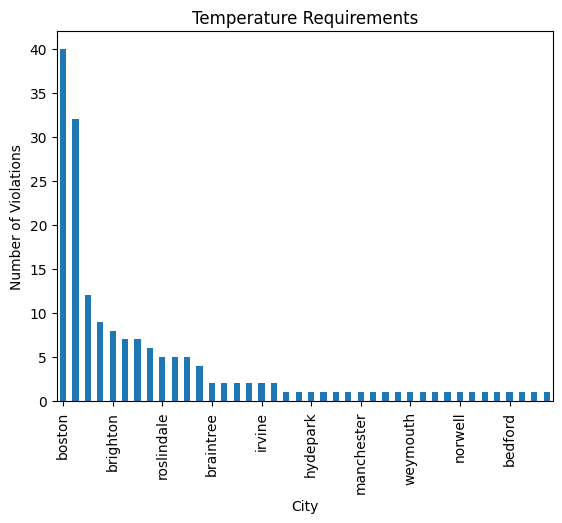

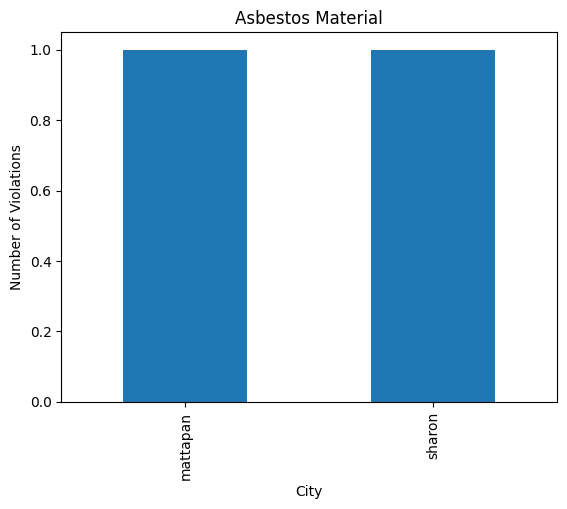

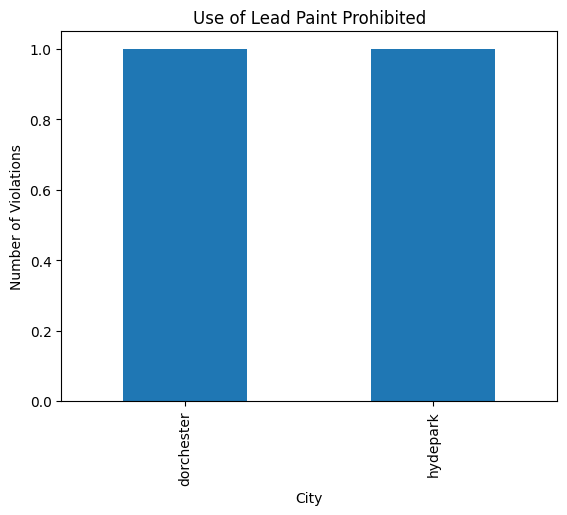

In [64]:
#Use city and create table
import matplotlib.pyplot as plt
'''Okay to save the data returned by value_counts I am converting it to a df, and to save the df for each violation I am saving it to a dictionary'''
violations_by_city = {} #key: violation name, value: df that contains the location and frequency of the violations

# Go through each of the hazardous conditions violations
for name, code in violations.items():
    # Look at only this violation (code name in the dataset have other values beyond the code # so had to use contains)
    mask = df['code'].str.contains(code, case=False, na=False)
    df_code =  df[mask]
    # Count the number of violations for each address
    count = df_code['contact_city'].value_counts()

    #Convert value counts into a new dataframe to save the data
    df_violation = pd.DataFrame(count)
    df_violation = df_violation.reset_index()
    df_violation.columns = ['Location', 'Counts']
    violations_by_city[name] = df_violation
    
    # Plot the count 
    count.plot(kind='bar', rot=0)

    plt.locator_params(axis='x', nbins=10)
    plt.xticks(rotation='vertical')

    plt.title(name)
    plt.xlabel('City')
    plt.ylabel('Number of Violations')
    plt.show()


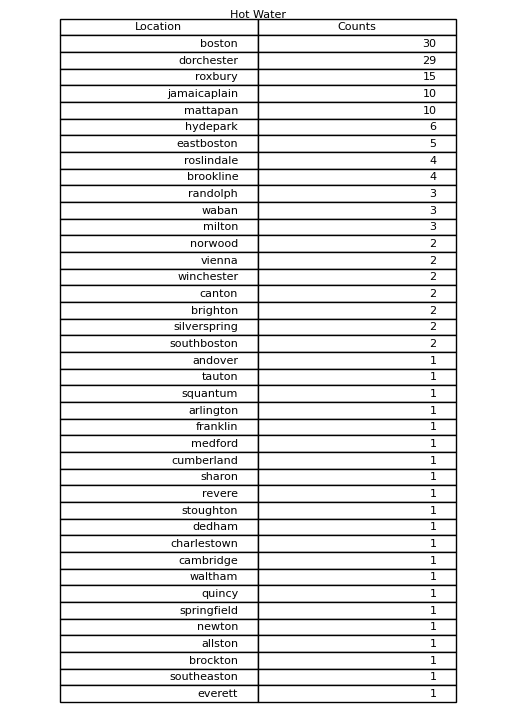

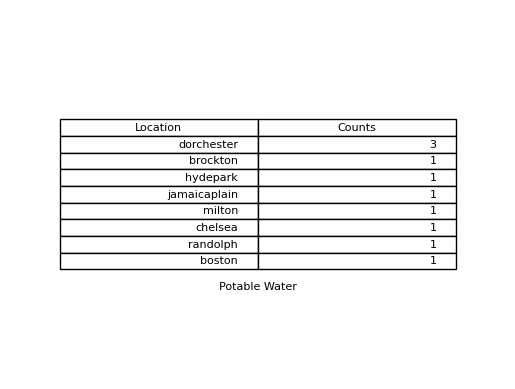

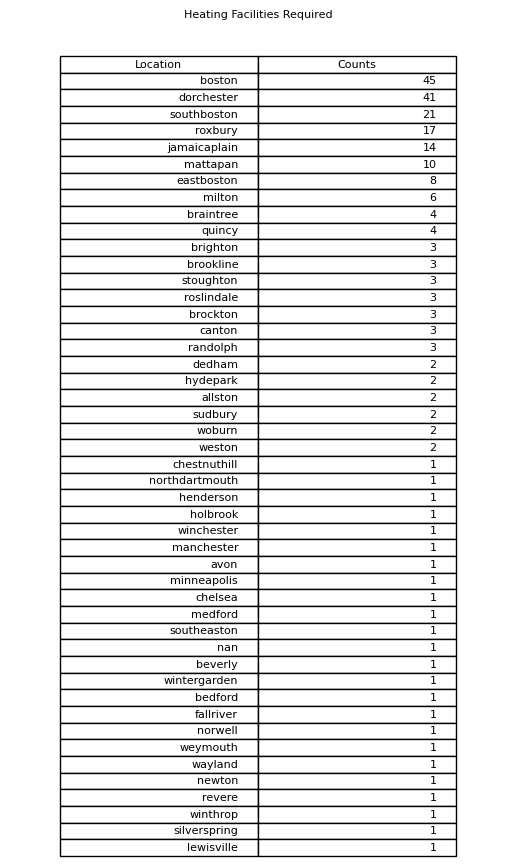

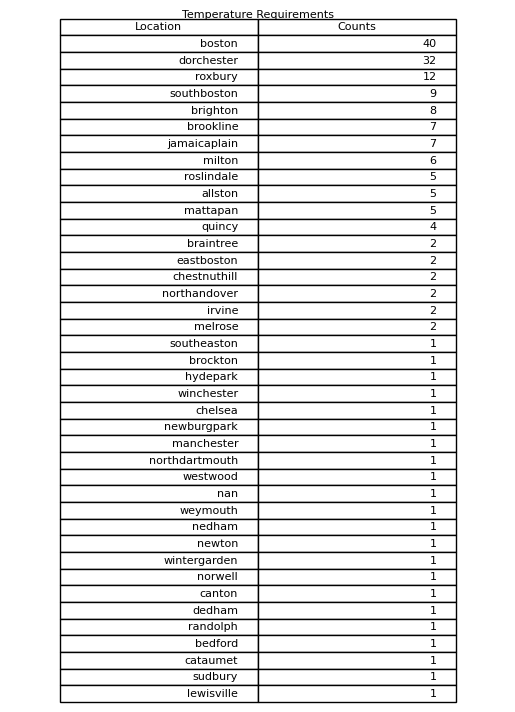

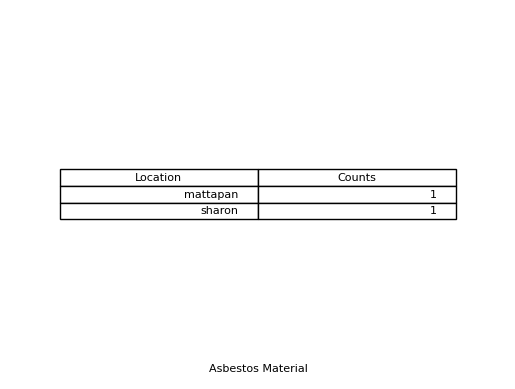

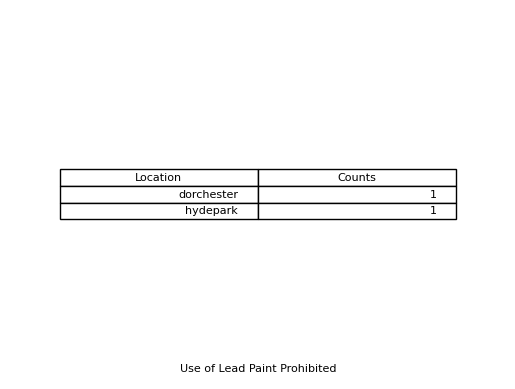

In [65]:
# Plot tables for each violation with frequency by city
for violation, df in violations_by_city.items():
    
    fig, ax = plt.subplots()
    ax.axis('off')
    ax.axis('tight')
    ax.set_title(violation)
    ax.set_title(violation, fontsize=8, y=(0.037 *len(df.values)), pad=-14)
    t= ax.table(cellText=df.values, colWidths = [0.4]*len(df.columns),  colLabels=df.columns, loc='center')
    t.auto_set_font_size(False) 
    t.set_fontsize(8)
    #fig.tight_layout()
    plt.show()
    




In [121]:
# Create df with all violations data 
# Columns: Building Location + each violation
# Rows: Number of violation (for each type of violation) by building 
buildings_df = violations_by_building["Hot Water"]
buildings_df = buildings_df.rename(columns = {'Counts':"Hot Water"})

for violation, df in violations_by_building.items(): 
    df = df.rename(columns = {'Counts':violation})
    if violation != "Hot Water":
        buildings_df = pd.merge(buildings_df, df, how = 'outer', on = 'Location')


# Fill NAN values with 0 so we can get Total
buildings_df = buildings_df.fillna(0)
buildings_df.head(10)

#Create a Total column which sums the number of violations for each Location
buildings_df = buildings_df.assign(Total = lambda x: x.iloc[:,[1,2,3,4,5,6]].sum(axis = 1))

# Also sort so it's in decending order (better for the plot)
buildings_df = buildings_df.sort_values(by = "Total", ascending = False)





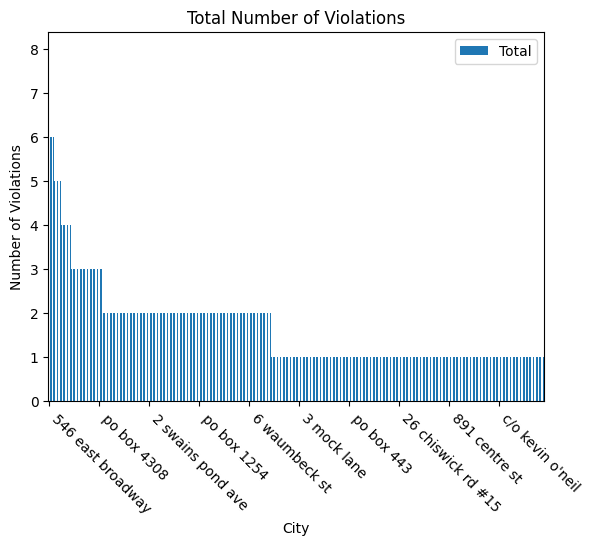

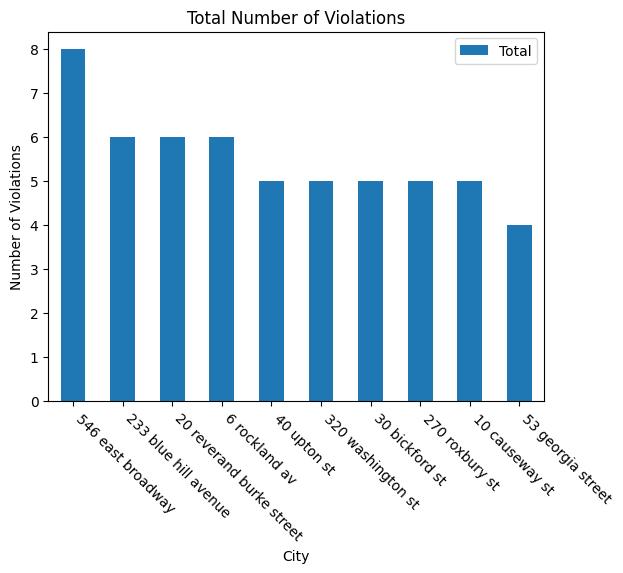

In [125]:
#Plot violations Totals by Buildings

buildings_df[['Location', 'Total']].set_index('Location').plot(kind='bar', rot=0) #set index works but I don't want to have problems later

plt.locator_params(axis='x', nbins = 10)
plt.xticks(rotation=-45, ha = 'left')

plt.title("Total Number of Violations")
plt.xlabel('City')
plt.ylabel('Number of Violations')
plt.show()

#TODO: fix formatting

# AND plot top 10

buildings_df[['Location', 'Total']].iloc[0:10].set_index('Location').plot(kind='bar', rot=0) #set index works but I don't want to have problems later

plt.locator_params(axis='x', nbins = 10)
plt.xticks(rotation=-45, ha = 'left')

plt.title("Total Number of Violations")
plt.xlabel('City')
plt.ylabel('Number of Violations')
plt.show()

In [108]:
# Create df with all violations data 
# Columns: CIty Location + each violation
# Rows: Number of violation (for each type of violation) by city
cities_df = violations_by_city["Hot Water"]
cities_df = cities_df.rename(columns = {'Counts':"Hot Water"})

for violation, df in violations_by_city.items(): 
    df = df.rename(columns = {'Counts':violation})
    if violation != "Hot Water":
        cities_df = pd.merge(cities_df, df, how = 'outer', on = 'Location')


# Fill NAN values with 0 so we can get Total
cities_df = cities_df.fillna(0)

# Create a Total column which sums the number of violations for each Location
cities_df = cities_df.assign(Total = lambda x: x.iloc[:,[1,2,3,4,5,6]].sum(axis = 1))

# Also sort so it's in decending order (better for the plot)
cities_df = cities_df.sort_values(by = "Total", ascending = False)





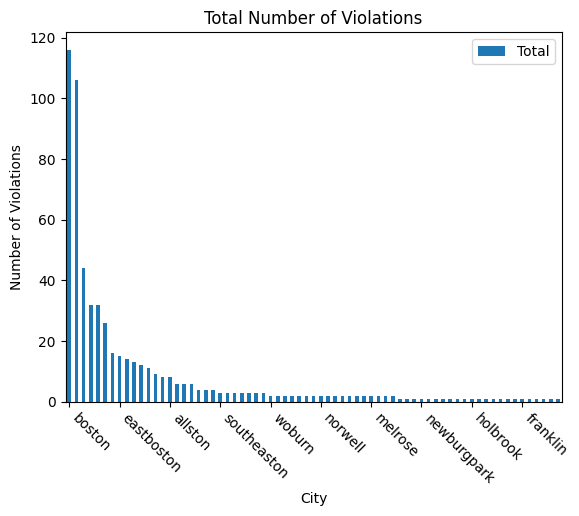

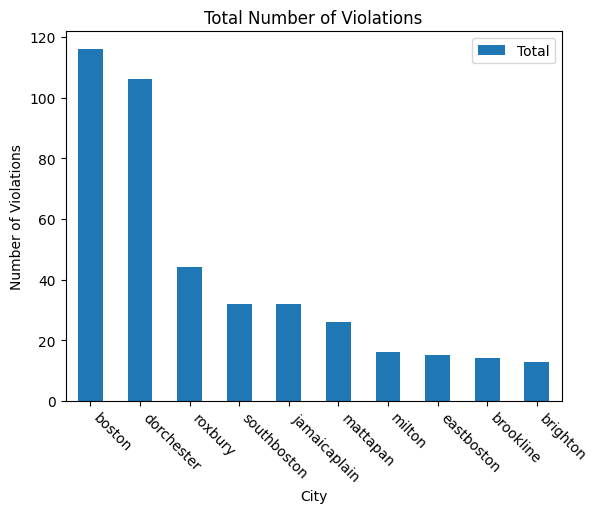

In [126]:
#Plot violation totals by city

cities_df[['Location', 'Total']].set_index('Location').plot(kind='bar', rot=0) #set index works but I don't want to have problems later

plt.locator_params(axis='x', nbins = 10)
plt.xticks(rotation=-45, ha = 'left')

plt.title("Total Number of Violations")
plt.xlabel('City')
plt.ylabel('Number of Violations')
plt.show()

#TODO: fix formatting

# AND plot top 10

cities_df[['Location', 'Total']].iloc[0:10].set_index('Location').plot(kind='bar', rot=0) #set index works but I don't want to have problems later

plt.locator_params(axis='x', nbins = 10)
plt.xticks(rotation=-45, ha = 'left')

plt.title("Total Number of Violations")
plt.xlabel('City')
plt.ylabel('Number of Violations')
plt.show()
